## MLSC - Classification Excercise

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context 

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the csv file

In [11]:
df=pd.read_csv("bank.csv")

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


In [18]:
print("Shape of dataset:", df.shape)

Shape of dataset: (9640, 11)


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [29]:
#No missing Values

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [29]:
print("Shape after oulier removal:", df.shape)

Shape after oulier removal: (6558, 11)


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df['y'] = df['y'].map({"yes":0, "no":1})
X = df.drop("y", axis=1)
y = df['y']

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# None to remove in the dataset.
# All the variables in this dataset seems to be usefull for prediction

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

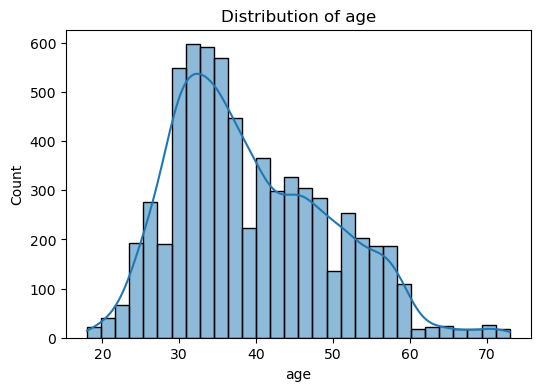

Skewness of age: 0.5989


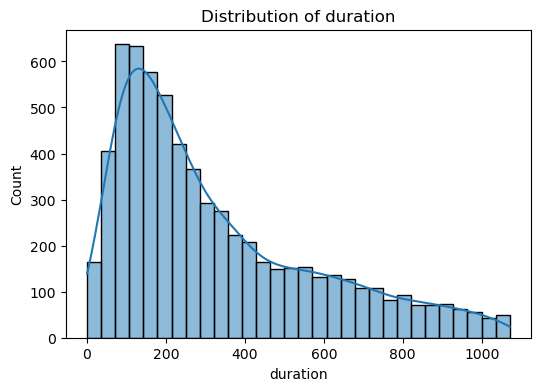

Skewness of duration: 1.0432


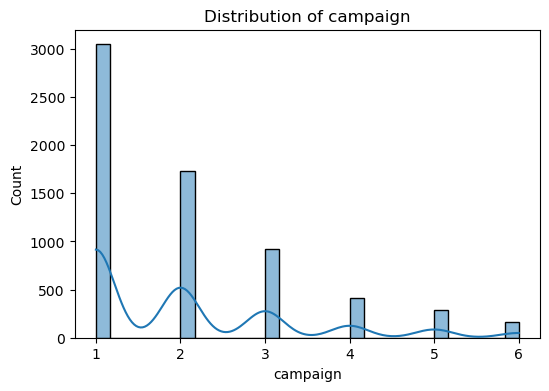

Skewness of campaign: 1.3241


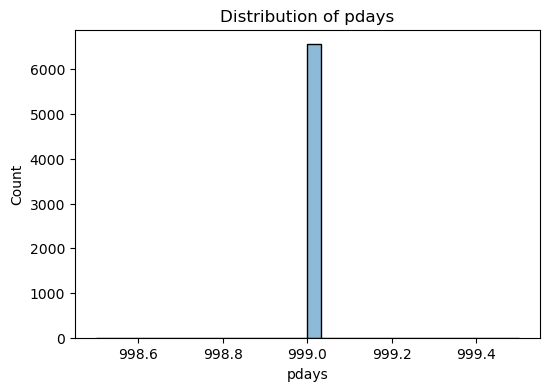

Skewness of pdays: 0.0000


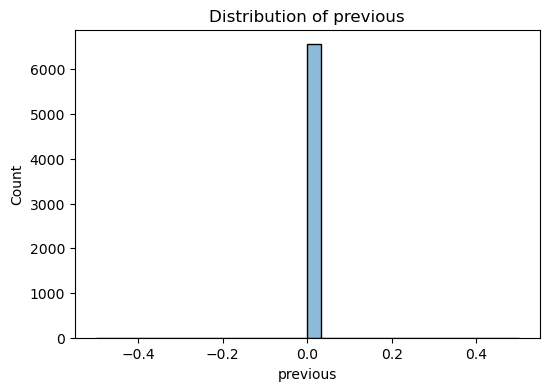

Skewness of previous: 0.0000


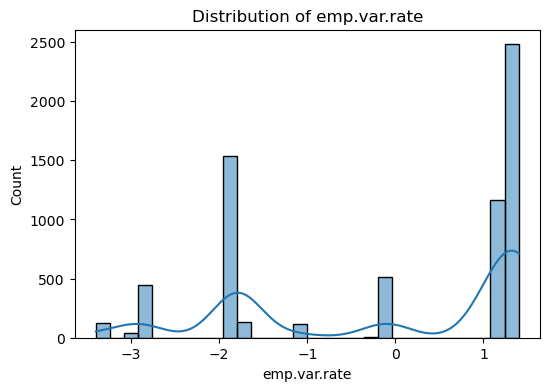

Skewness of emp.var.rate: -0.5760


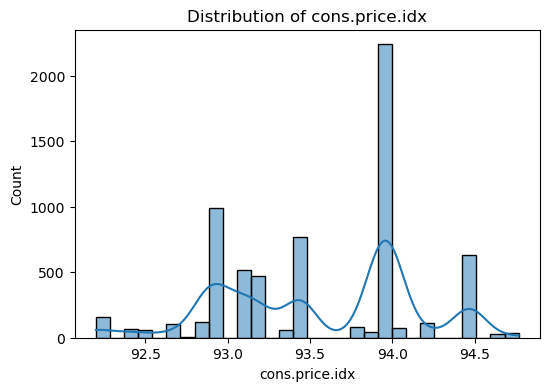

Skewness of cons.price.idx: -0.2142


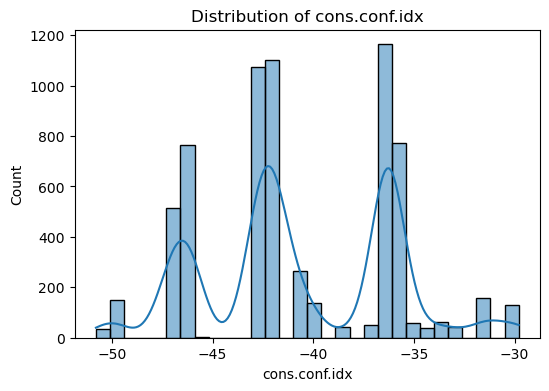

Skewness of cons.conf.idx: 0.1048


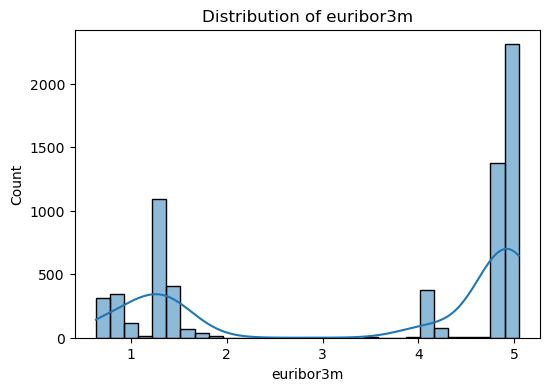

Skewness of euribor3m: -0.5460


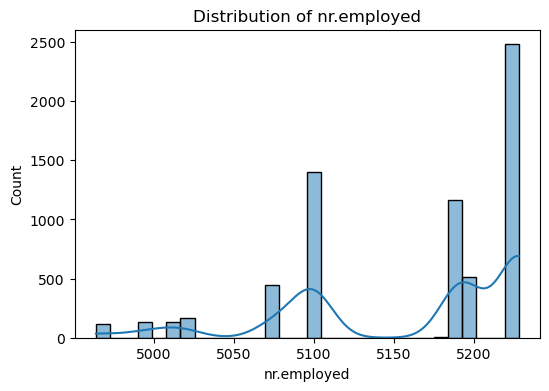

Skewness of nr.employed: -0.8807


In [41]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"Skewness of {col}: {df[col].skew():.4f}") 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

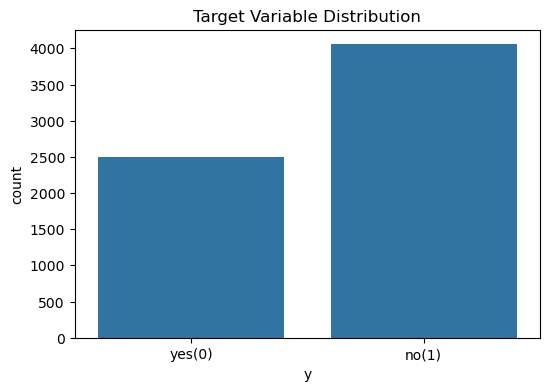

Target counts:
 y
1    4055
0    2503
Name: count, dtype: int64


In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.xticks([0,1], ["yes(0)", "no(1)"])
plt.show()
print("Target counts:\n", y.value_counts())

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled feature matrix shape:", X_scaled.shape)

Scaled feature matrix shape: (6558, 10)


<a id="logreg"> </a>
## 2. Logistic regression model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, random_state=42, test_size=0.2, stratify=y
)

In [68]:
#Fit Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [72]:
#Coefficients -> log odds
coeffs = pd.DataFrame({
    'Feature': df.drop("y", axis=1).columns,
    'Coefficient': log_reg.coef_[0],
    'Odds Ratio': np.exp(log_reg.coef_[0])
})
print(coeffs)

          Feature  Coefficient  Odds Ratio
0             age     0.034702    1.035312
1        duration    -1.970827    0.139342
2        campaign     0.031010    1.031496
3           pdays     0.000000    1.000000
4        previous     0.000000    1.000000
5    emp.var.rate     1.822584    6.187826
6  cons.price.idx     0.024147    1.024441
7   cons.conf.idx     0.051832    1.053199
8       euribor3m    -1.661343    0.189884
9     nr.employed     1.352746    3.868031


Inference: Longer call duration and favorable interest rates significantly increase the likelihood of clients subscribing, 
while higher campaign contacts and unstable economic indicators raise the odds of non‑subscription. 
Overall, client engagement factors drive positive outcomes, whereas macroeconomic conditions tend to discourage deposits.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table> 

In [75]:
from sklearn.metrics import roc_curve

y_probs = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

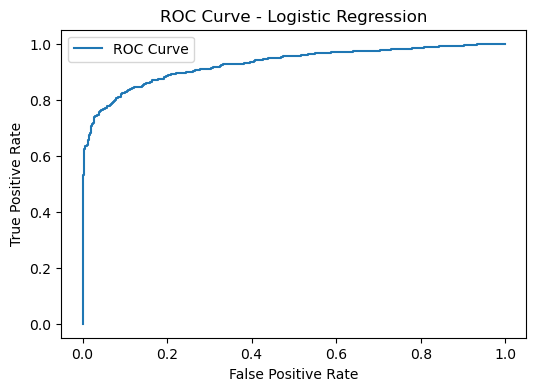

In [77]:
#plotting ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [81]:
#Find threshold closest to perfect classifier(maximize TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal_Threshold:", optimal_threshold)

Optimal_Threshold: 0.6848945768378177


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
from sklearn.metrics import confusion_matrix

y_pred_default = (y_probs >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_default)
print("Confusion matrix(threshold=0.5):\n", cm)

accuracy_manual = (cm[0,0] + cm[1,1]) / cm.sum()
print("Manual Accuracy:", accuracy_manual)

Confusion matrix(threshold=0.5):
 [[393 108]
 [ 88 723]]
Manual Accuracy: 0.850609756097561


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
from sklearn.metrics import cohen_kappa_score

y_pred_kappa = (y_probs >= 0.18).astype(int)
kappa = cohen_kappa_score(y_test, y_pred_kappa)
print("Kappa (threshold:0.18):", kappa)

Kappa (threshold:0.18): 0.4737058207003858


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
from sklearn.metrics import log_loss

cross_entropy = log_loss(y_test, y_probs)
print("Cross Entropy(Log Loss):", cross_entropy)

Cross Entropy(Log Loss): 0.34294423408796304


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8700361010830325
Recall: 0.8914919852034525
F1 Score: 0.8806333739342266


## 3.Build a Decision Tree model and generate a classification report.



In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

y_pred_dt_full = dt_full.predict(X_test)

print("Decision Tree - Full Model Report:\n", classification_report(y_test, y_pred_dt_full))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_full))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_full))

#Grid Search for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': ['None', 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1    
)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

#Optimised model
dt_opt = grid_search.best_estimator_
y_pred_dt_opt = dt_opt.predict(X_test)

print("\nDecision Tree - Optimized Model Report:\n", classification_report(y_test, y_pred_dt_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_opt))

Decision Tree - Full Model Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       501
           1       0.87      0.88      0.87       811

    accuracy                           0.84      1312
   macro avg       0.83      0.83      0.83      1312
weighted avg       0.84      0.84      0.84      1312

Confusion Matrix:
 [[391 110]
 [100 711]]
Accuracy: 0.8399390243902439
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree - Optimized Model Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       501
           1       0.93      0.86      0.90       811

    accuracy                           0.88      1312
   macro avg       0.87      0.88      0.87      1312
weighted avg       0.88      0.88      0.88      1312

Confusion Matrix:
 [[452  49]
 [111 700]]
Accuracy: 0.8780487804878049


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [108]:
# Collect metrics for Full model
accuracy_full = accuracy_score(y_test, y_pred_dt_full)
precision_full = precision_score(y_test, y_pred_dt_full)
recall_full = recall_score(y_test, y_pred_dt_full)
f1_full = f1_score(y_test, y_pred_dt_full)

# Collect metrics for Optimized model
accuracy_opt = accuracy_score(y_test, y_pred_dt_opt)
precision_opt = precision_score(y_test, y_pred_dt_opt)
recall_opt = recall_score(y_test, y_pred_dt_opt)
f1_opt = f1_score(y_test, y_pred_dt_opt)

# Create comparison table
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Full Model": [accuracy_full, precision_full, recall_full, f1_full],
    "Optimized Model": [accuracy_opt, precision_opt, recall_opt, f1_opt]
})

print(comparison)

      Metric  Full Model  Optimized Model
0   Accuracy    0.839939         0.878049
1  Precision    0.866017         0.934579
2     Recall    0.876695         0.863132
3   F1 Score    0.871324         0.897436


## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [110]:
from sklearn.ensemble import RandomForestClassifier

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
rf_full = RandomForestClassifier(random_state=42, n_estimators=30)
rf_full.fit(X_train, y_train)

y_pred_rf_full = rf_full.predict(X_test)

print("Random Forest - Full Model Report:\n", classification_report(y_test, y_pred_rf_full))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_full))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_full))

Random Forest - Full Model Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       501
           1       0.91      0.89      0.90       811

    accuracy                           0.88      1312
   macro avg       0.87      0.87      0.87      1312
weighted avg       0.88      0.88      0.88      1312

Confusion Matrix:
 [[432  69]
 [ 93 718]]
Accuracy: 0.8765243902439024


In [115]:
# Define parameter grid
param_grid = {
    'n_estimators': [30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search_rf.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
# Optimized model
rf_opt = grid_search_rf.best_estimator_
y_pred_rf_opt = rf_opt.predict(X_test)

print("\nRandom Forest - Optimized Model Report:\n", classification_report(y_test, y_pred_rf_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_opt))

# Collect metrics for Full model
accuracy_full = accuracy_score(y_test, y_pred_rf_full)
precision_full = precision_score(y_test, y_pred_rf_full)
recall_full = recall_score(y_test, y_pred_rf_full)
f1_full = f1_score(y_test, y_pred_rf_full)

# Collect metrics for Optimized model
accuracy_opt = accuracy_score(y_test, y_pred_rf_opt)
precision_opt = precision_score(y_test, y_pred_rf_opt)
recall_opt = recall_score(y_test, y_pred_rf_opt)
f1_opt = f1_score(y_test, y_pred_rf_opt)

# Create comparison table
comparison_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Full Model": [accuracy_full, precision_full, recall_full, f1_full],
    "Optimized Model": [accuracy_opt, precision_opt, recall_opt, f1_opt]
})

print(comparison_rf)


Random Forest - Optimized Model Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       501
           1       0.93      0.88      0.90       811

    accuracy                           0.88      1312
   macro avg       0.87      0.89      0.88      1312
weighted avg       0.89      0.88      0.88      1312

Confusion Matrix:
 [[446  55]
 [ 97 714]]
Accuracy: 0.8841463414634146
      Metric  Full Model  Optimized Model
0   Accuracy    0.876524         0.884146
1  Precision    0.912325         0.928479
2     Recall    0.885327         0.880395
3   F1 Score    0.898623         0.903797


## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

XGBoost - Full Model Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       501
           1       0.93      0.88      0.90       811

    accuracy                           0.88      1312
   macro avg       0.88      0.89      0.88      1312
weighted avg       0.89      0.88      0.89      1312

Accuracy: 0.8849085365853658


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


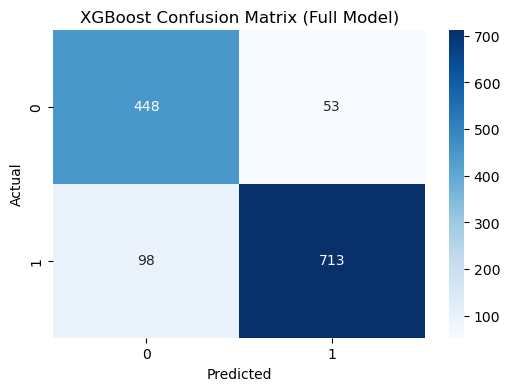

In [120]:
from xgboost import XGBClassifier

# Full model (fixed hyperparameters)
xgb_full = XGBClassifier(
    learning_rate=0.4,
    gamma=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_full.fit(X_train, y_train)
y_pred_xgb_full = xgb_full.predict(X_test)

# Accuracy and classification report
print("XGBoost - Full Model Report:\n", classification_report(y_test, y_pred_xgb_full))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_full))

# Confusion matrix plot
cm_full = confusion_matrix(y_test, y_pred_xgb_full)
plt.figure(figsize=(6,4))
sns.heatmap(cm_full, annot=True, fmt='d', cmap="Blues")
plt.title("XGBoost Confusion Matrix (Full Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [122]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'gamma': [0, 1, 3, 5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search_xgb.best_params_)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best Hyperparameters: {'gamma': 1, 'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 50}


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


XGBoost - Optimized Model Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       501
           1       0.92      0.88      0.90       811

    accuracy                           0.88      1312
   macro avg       0.87      0.88      0.88      1312
weighted avg       0.88      0.88      0.88      1312

Accuracy: 0.8810975609756098


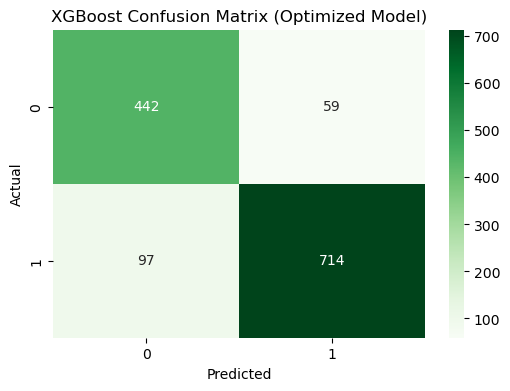

      Metric  Full Model  Optimized Model
0   Accuracy    0.884909         0.881098
1  Precision    0.930809         0.923674
2     Recall    0.879162         0.880395
3   F1 Score    0.904249         0.901515


In [124]:
# Optimized model
xgb_opt = grid_search_xgb.best_estimator_
y_pred_xgb_opt = xgb_opt.predict(X_test)

print("\nXGBoost - Optimized Model Report:\n", classification_report(y_test, y_pred_xgb_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_opt))

# Confusion matrix plot for optimized model
cm_opt = confusion_matrix(y_test, y_pred_xgb_opt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap="Greens")
plt.title("XGBoost Confusion Matrix (Optimized Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Collect metrics for Full model
accuracy_full = accuracy_score(y_test, y_pred_xgb_full)
precision_full = precision_score(y_test, y_pred_xgb_full)
recall_full = recall_score(y_test, y_pred_xgb_full)
f1_full = f1_score(y_test, y_pred_xgb_full)

# Collect metrics for Optimized model
accuracy_opt = accuracy_score(y_test, y_pred_xgb_opt)
precision_opt = precision_score(y_test, y_pred_xgb_opt)
recall_opt = recall_score(y_test, y_pred_xgb_opt)
f1_opt = f1_score(y_test, y_pred_xgb_opt)

# Create comparison table
comparison_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Full Model": [accuracy_full, precision_full, recall_full, f1_full],
    "Optimized Model": [accuracy_opt, precision_opt, recall_opt, f1_opt]
})

print(comparison_xgb)


## 6.Build the K - Nearest Neighbor Model

In [126]:
from sklearn.neighbors import KNeighborsClassifier
# Full model (default K=5)
knn_full = KNeighborsClassifier(n_neighbors=5)
knn_full.fit(X_train, y_train)

y_pred_knn_full = knn_full.predict(X_test)

print("KNN - Full Model Report:\n", classification_report(y_test, y_pred_knn_full))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_full))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_full))

KNN - Full Model Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       501
           1       0.91      0.87      0.89       811

    accuracy                           0.87      1312
   macro avg       0.86      0.86      0.86      1312
weighted avg       0.87      0.87      0.87      1312

Confusion Matrix:
 [[433  68]
 [109 702]]
Accuracy: 0.8650914634146342


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

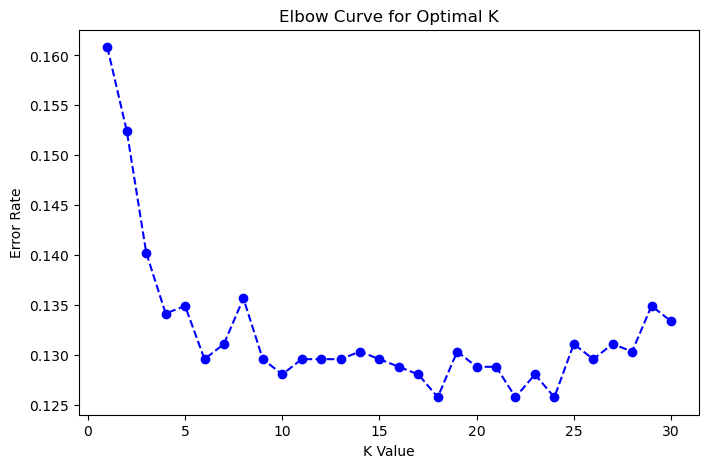

Optimal K Value: 18


In [128]:
error_rate = []
k_range = range(1, 31)  # test K from 1 to 30

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, error_rate, marker='o', linestyle='--', color='b')
plt.title("Elbow Curve for Optimal K")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()

# Optimal K is where error rate stabilizes (elbow point)
optimal_k = k_range[np.argmin(error_rate)]
print("Optimal K Value:", optimal_k)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
# Optimized model with best K
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train, y_train)
y_pred_knn_opt = knn_opt.predict(X_test)

print("\nKNN - Optimized Model Report:\n", classification_report(y_test, y_pred_knn_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_opt))

# Collect metrics for Full model
accuracy_full = accuracy_score(y_test, y_pred_knn_full)
precision_full = precision_score(y_test, y_pred_knn_full)
recall_full = recall_score(y_test, y_pred_knn_full)
f1_full = f1_score(y_test, y_pred_knn_full)

# Collect metrics for Optimized model
accuracy_opt = accuracy_score(y_test, y_pred_knn_opt)
precision_opt = precision_score(y_test, y_pred_knn_opt)
recall_opt = recall_score(y_test, y_pred_knn_opt)
f1_opt = f1_score(y_test, y_pred_knn_opt)

# Create comparison table
comparison_knn = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Full Model (K=5)": [accuracy_full, precision_full, recall_full, f1_full],
    "Optimized Model (K={})".format(optimal_k): [accuracy_opt, precision_opt, recall_opt, f1_opt]
})

print(comparison_knn)



KNN - Optimized Model Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       501
           1       0.92      0.87      0.90       811

    accuracy                           0.87      1312
   macro avg       0.86      0.88      0.87      1312
weighted avg       0.88      0.87      0.88      1312

Confusion Matrix:
 [[442  59]
 [106 705]]
Accuracy: 0.8742378048780488
      Metric  Full Model (K=5)  Optimized Model (K=18)
0   Accuracy          0.865091                0.874238
1  Precision          0.911688                0.922775
2     Recall          0.865598                0.869297
3   F1 Score          0.888046                0.895238


## 7. Build the Naive Bayes Model

In [134]:
# 7. Build the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# 7.1 Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("Gaussian NB Report:\n", classification_report(y_test, y_pred_gnb))
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))

# 7.2 Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print("\nBernoulli NB Report:\n", classification_report(y_test, y_pred_bnb))
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))


Gaussian NB Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       501
           1       0.88      0.78      0.83       811

    accuracy                           0.80      1312
   macro avg       0.79      0.81      0.79      1312
weighted avg       0.81      0.80      0.80      1312

Accuracy: 0.8003048780487805

Bernoulli NB Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       501
           1       0.80      0.79      0.79       811

    accuracy                           0.74      1312
   macro avg       0.73      0.73      0.73      1312
weighted avg       0.74      0.74      0.74      1312

Accuracy: 0.7439024390243902


7.3 Multinomial Naive Bayes
Multinomial NB was excluded as the dataset contains negative scaled values, making it unsuitable.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [137]:
# Collect metrics for each NB variant
results_nb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Gaussian NB": [
        accuracy_score(y_test, y_pred_gnb),
        precision_score(y_test, y_pred_gnb),
        recall_score(y_test, y_pred_gnb),
        f1_score(y_test, y_pred_gnb)
    ],
    "Bernoulli NB": [
        accuracy_score(y_test, y_pred_bnb),
        precision_score(y_test, y_pred_bnb),
        recall_score(y_test, y_pred_bnb),
        f1_score(y_test, y_pred_bnb)
    ]
})

print(results_nb)


      Metric  Gaussian NB  Bernoulli NB
0   Accuracy     0.800305      0.743902
1  Precision     0.883916      0.796504
2     Recall     0.779285      0.786683
3   F1 Score     0.828309      0.791563


## 8. Compare the results of all above mentioned algorithms 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary of fitted models (already trained in earlier steps)
models = {
    "Logistic Regression": log_reg,
    "Decision Tree (Full)": dt_full,
    "Decision Tree (Optimized)": dt_opt,
    "Random Forest (Full)": rf_full,
    "Random Forest (Optimized)": rf_opt,
    "XGBoost (Full)": xgb_full,
    "XGBoost (Optimized)": xgb_opt,
    "KNN (Full)": knn_full,
    "KNN (Optimized)": knn_opt,
    "Gaussian NB": gnb,
    "Bernoulli NB": bnb
}

# Predictions and probabilities
predictions, probabilities = {}, {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        probabilities[name] = model.predict_proba(X_test)[:, 1]

# Build comparison table
results = []
for name, y_pred in predictions.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

models_results = pd.DataFrame(results)
print(models_results)



                        Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.850610   0.870036  0.891492  0.880633
1        Decision Tree (Full)  0.839939   0.866017  0.876695  0.871324
2   Decision Tree (Optimized)  0.878049   0.934579  0.863132  0.897436
3        Random Forest (Full)  0.876524   0.912325  0.885327  0.898623
4   Random Forest (Optimized)  0.884146   0.928479  0.880395  0.903797
5              XGBoost (Full)  0.884909   0.930809  0.879162  0.904249
6         XGBoost (Optimized)  0.881098   0.923674  0.880395  0.901515
7                  KNN (Full)  0.865091   0.911688  0.865598  0.888046
8             KNN (Optimized)  0.874238   0.922775  0.869297  0.895238
9                 Gaussian NB  0.800305   0.883916  0.779285  0.828309
10               Bernoulli NB  0.743902   0.796504  0.786683  0.791563


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

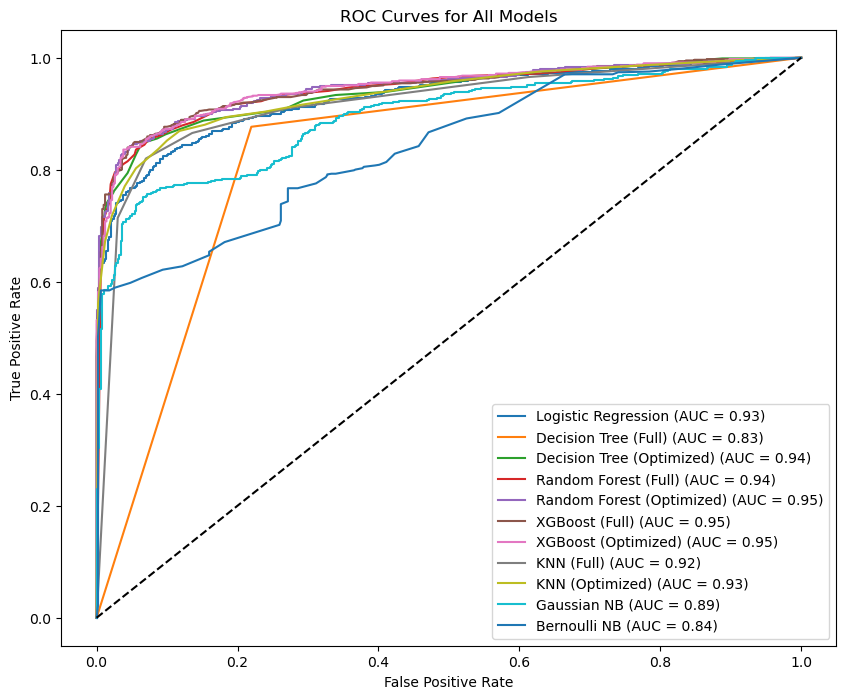

In [151]:
plt.figure(figsize=(10,8))

for name, y_probs in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>comput cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [153]:
cross_entropy_results = []
for name, y_probs in probabilities.items():
    cross_entropy_results.append({
        "Model": name,
        "Cross Entropy": log_loss(y_test, y_probs)
    })

cross_entropy_df = pd.DataFrame(cross_entropy_results)
print(cross_entropy_df)


                        Model  Cross Entropy
0         Logistic Regression       0.342944
1        Decision Tree (Full)       5.769182
2   Decision Tree (Optimized)       0.313472
3        Random Forest (Full)       0.553064
4   Random Forest (Optimized)       0.274809
5              XGBoost (Full)       0.274789
6         XGBoost (Optimized)       0.274241
7                  KNN (Full)       1.393826
8             KNN (Optimized)       0.377165
9                 Gaussian NB       0.694982
10               Bernoulli NB       0.607490


## 9. Intrepret your solution based on the results

The results show that ensemble methods (Random Forest and XGBoost) are the most powerful for this dataset,
with XGBoost emerging as the top performer due to its superior accuracy, balanced metrics,
and lowest cross entropy. Logistic Regression remains a strong, interpretable baseline with
competitive precision and recall.
Naive Bayes provides a lightweight alternative but is less effective for continuous features.